# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B_W/week4/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select = df[['trans_date_trans_time', 'category', 'amt', 'city_pop', 
                'is_fraud']]

In [10]:
df_select['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

<ipython-input-10-344d31e302b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


In [11]:
df_select['time_var'] = [i.second for i in df_select['trans_date_trans_time']]

<ipython-input-11-00d328ef3340>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var'] = [i.second for i in df_select['trans_date_trans_time']]


In [12]:
dummies = pd.get_dummies(df_select['category'])

In [13]:
X = pd.concat([dummies, df_select[['amt', 'city_pop', 'time_var']]],axis = 1)
y = df_select['is_fraud']

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=441)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [17]:
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import SMOTE

In [18]:
ros = RandomOverSampler(random_state = 0) 
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler(random_state = 0)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

smote = SMOTE(random_state = 0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models 

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model_over = LogisticRegression() 
model_under = LogisticRegression() 
model_smote = LogisticRegression()

In [23]:
log_over = model_over.fit(X_train_over, y_train_over) 
log_under = model_under.fit(X_train_under, y_train_under) 
log_smote = model_smote.fit(X_train_smote, y_train_smote)

# 4.) Test the three models

In [25]:
print('log_over test Accuracy:', log_over.score(X_test, y_test)) 
print('log_under test Accuracy:', log_under.score(X_test, y_test)) 
print('log_smote test Accuracy:', log_smote.score(X_test, y_test))

log_over Accuracy: 0.8204071594807937
log_under Accuracy: 0.819855322824444
log_smote Accuracy: 0.8261174692291082


# 5.) Which performed best in Out of Sample metrics?

SMOTE performed best because of its highest accuracy.

# 6.) Pick two features and plot the two classes before and after SMOTE.

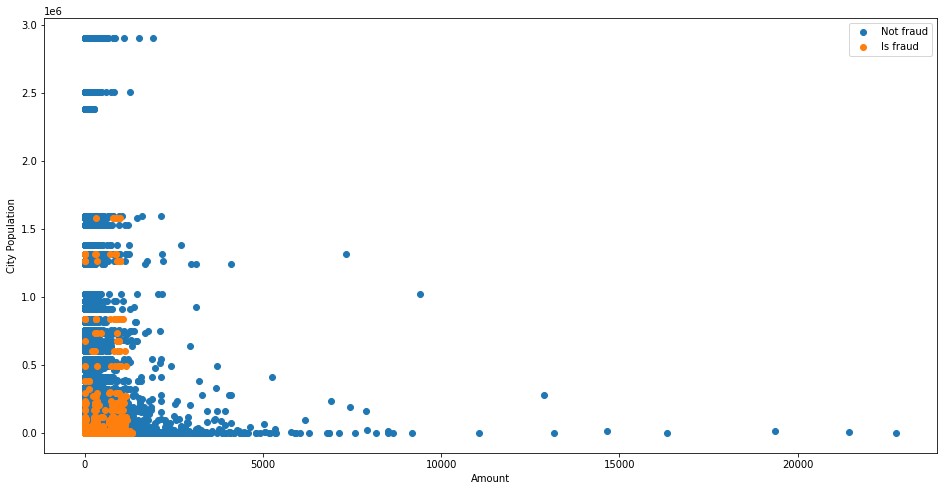

In [41]:
# Before SMOTE 
df_before = pd.concat([X_train, y_train], axis = 1) 
plt.figure(figsize = (16,8)) 
plt.scatter(df_before[df_before['is_fraud'] == 0]['amt'], df_before[df_before['is_fraud'] == 0]['city_pop']) 
plt.scatter(df_before[df_before['is_fraud'] == 1]['amt'], df_before[df_before['is_fraud'] == 1]['city_pop']) 
plt.legend(['Not fraud', 'Is fraud']) 
plt.xlabel('Amount') 
plt.ylabel('City Population') 
plt.show()

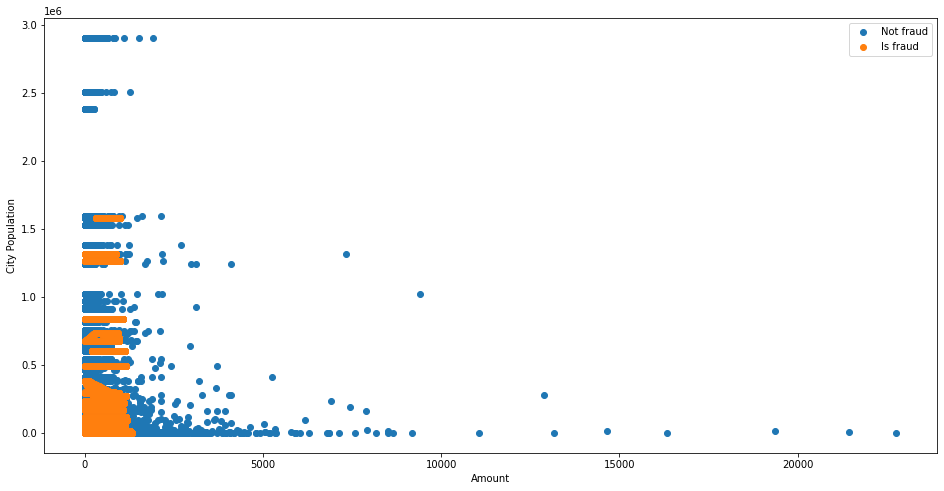

In [42]:
# After SMOTE 
df_before = pd.concat([X_train_smote, y_train_smote], axis = 1) 
plt.figure(figsize = (16,8)) 
plt.scatter(df_before[df_before['is_fraud'] == 0]['amt'], df_before[df_before['is_fraud'] == 0]['city_pop']) 
plt.scatter(df_before[df_before['is_fraud'] == 1]['amt'], df_before[df_before['is_fraud'] == 1]['city_pop']) 
plt.legend(['Not fraud', 'Is fraud']) 
plt.xlabel('Amount') 
plt.ylabel('City Population') 
plt.show()
